In [1]:
import bn
import ocr_data
import numpy as np
from IPython.display import clear_output

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,7]
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family'] = 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['errorbar.capsize'] = 3

In [3]:
hidden_layers = 1
hidden_size = 36
in_size = ocr_data.in_size
out_size = ocr_data.out_size

In [4]:
s = bn.System()
input_neurons = [s.add_neuron(input=True) for i in range(in_size)]
hidden_neurons = []
output_neurons = [s.add_neuron(output=True) for i in range(out_size)]
last_layer = input_neurons
for i_hidden in range(hidden_layers):
    hidden_layer = [s.add_neuron() for i_inner in range(hidden_size)]
    hidden_neurons.append(hidden_layer)
    for neuron in hidden_layer:
        for last_neuron in last_layer:
            neuron.add_input(last_neuron)
    last_layer = hidden_layer
for neuron in output_neurons:
    for last_neuron in last_layer:
        neuron.add_input(last_neuron)
s.finalize()

In [5]:
print('IN: %i OUT: %i TOTAL: %i WEIGHTS: %i'%(in_size,out_size,len(s.neurons),np.sum([len(n.weights) for n in s.neurons])))

IN: 64 OUT: 25 TOTAL: 125 WEIGHTS: 3204


In [6]:
def batch(length=10):
    cases = []
    successes = []
    for true_out,input in ocr_data.tagged_data(length):
        guess_out,state = s.guess(input,return_state=True)
        if np.any(guess_out != true_out):
            successes.append(False)
            s.learn(state,true_out,scale=1.0)
        else:
            successes.append(True)
    return cases,successes

In [7]:
while True:
    batch_size = 1000
    cases,successes = batch(batch_size)
    correct = np.count_nonzero(successes)
    print('batch accuracy',correct,'/',len(successes))
    if correct/len(successes) > 0.95:
        break

batch accuracy 211 / 1000
batch accuracy 422 / 1000
batch accuracy 589 / 1000
batch accuracy 670 / 1000
batch accuracy 688 / 1000
batch accuracy 756 / 1000
batch accuracy 804 / 1000
batch accuracy 805 / 1000
batch accuracy 815 / 1000
batch accuracy 861 / 1000
batch accuracy 849 / 1000
batch accuracy 805 / 1000
batch accuracy 862 / 1000
batch accuracy 843 / 1000
batch accuracy 882 / 1000
batch accuracy 810 / 1000
batch accuracy 843 / 1000
batch accuracy 890 / 1000
batch accuracy 897 / 1000
batch accuracy 884 / 1000
batch accuracy 896 / 1000
batch accuracy 919 / 1000
batch accuracy 883 / 1000
batch accuracy 898 / 1000
batch accuracy 861 / 1000
batch accuracy 880 / 1000
batch accuracy 899 / 1000
batch accuracy 893 / 1000
batch accuracy 918 / 1000
batch accuracy 904 / 1000
batch accuracy 892 / 1000
batch accuracy 880 / 1000
batch accuracy 898 / 1000
batch accuracy 929 / 1000
batch accuracy 894 / 1000
batch accuracy 883 / 1000
batch accuracy 917 / 1000
batch accuracy 891 / 1000
batch accura

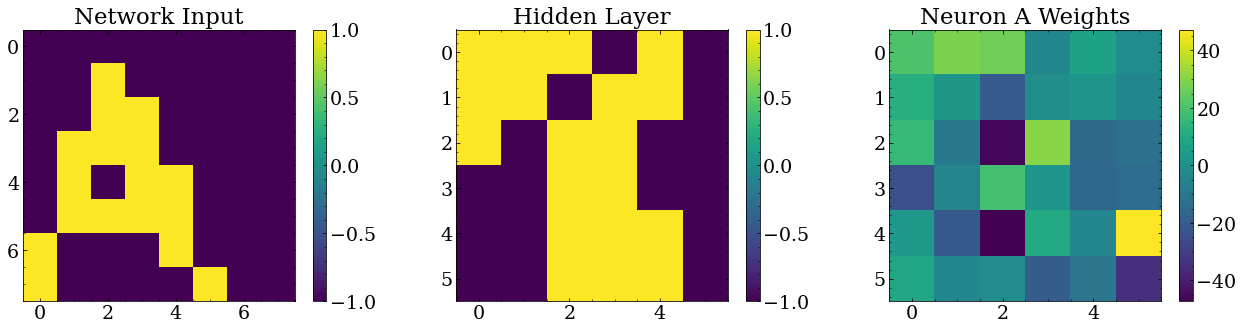

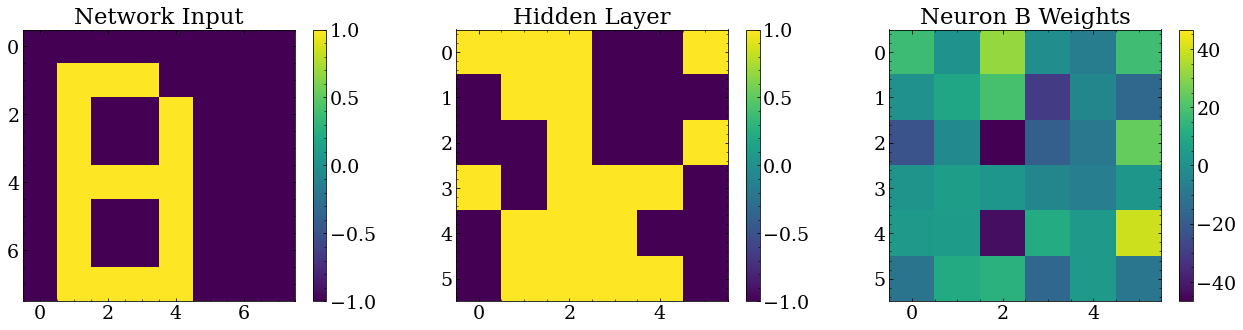

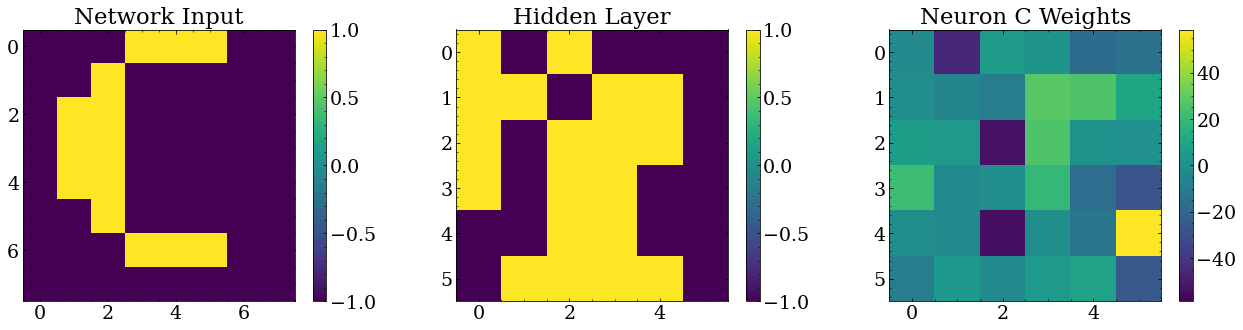

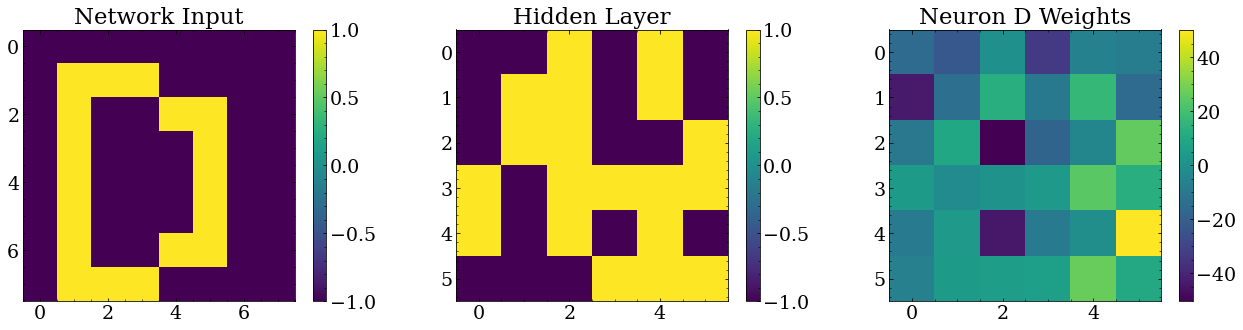

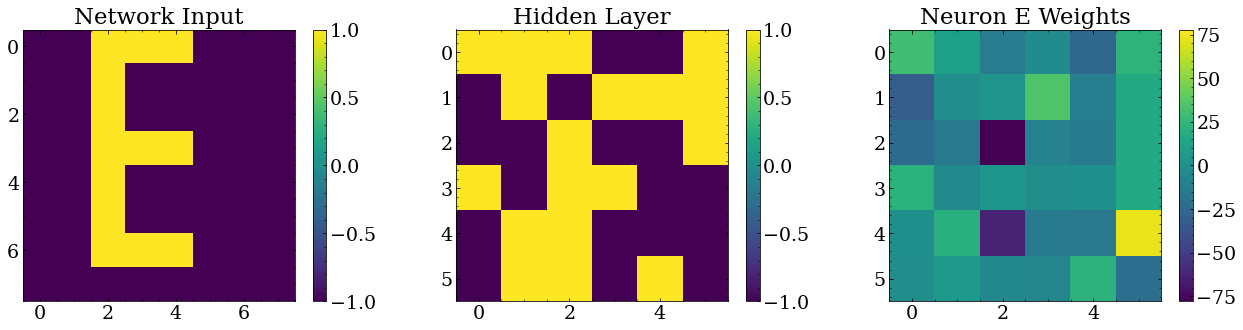

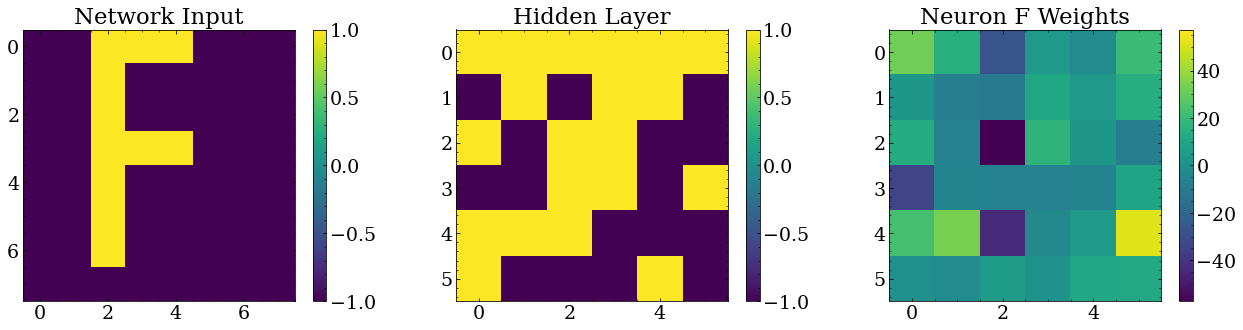

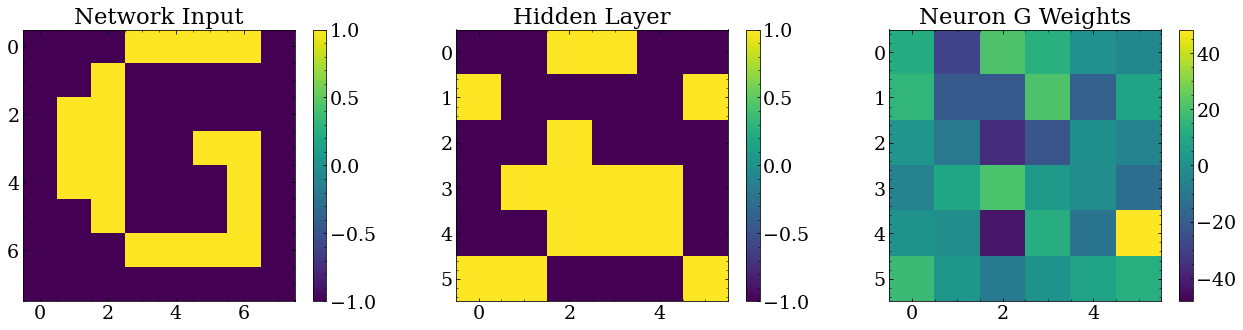

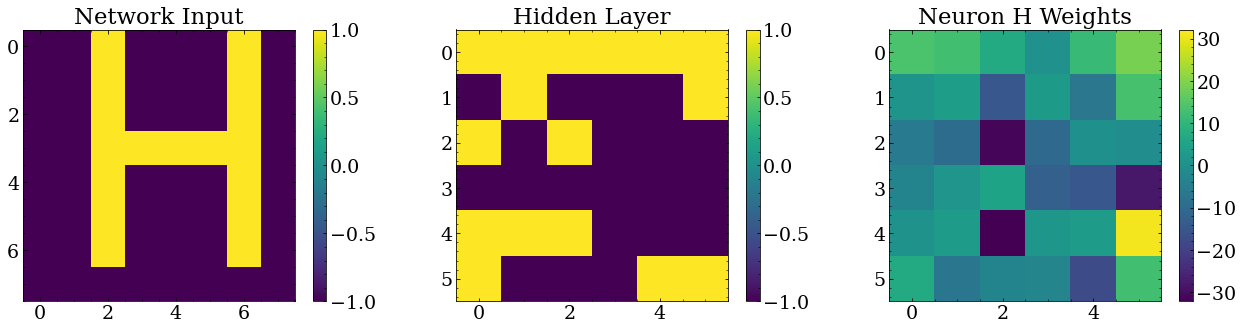

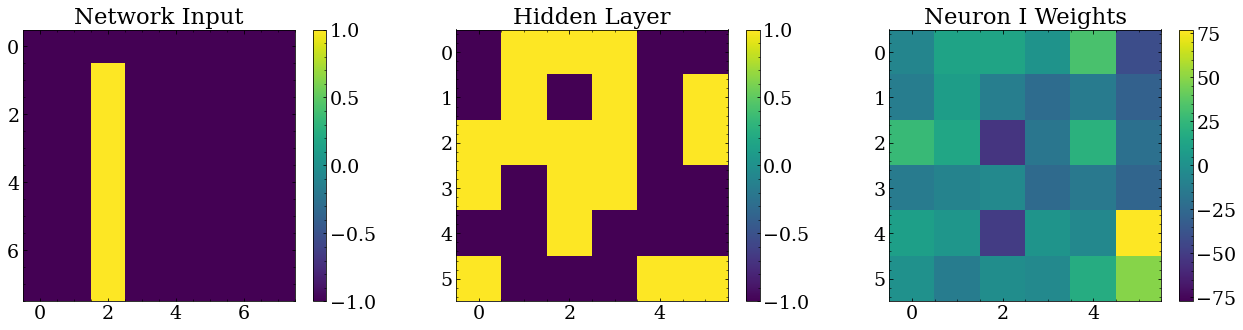

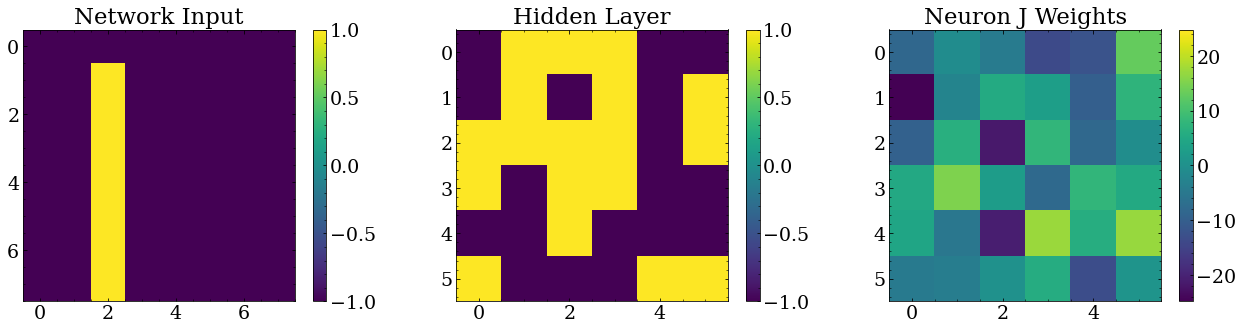

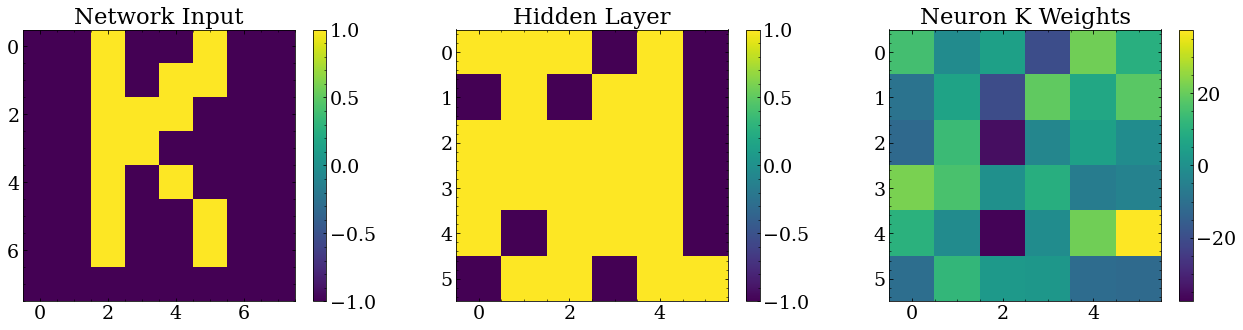

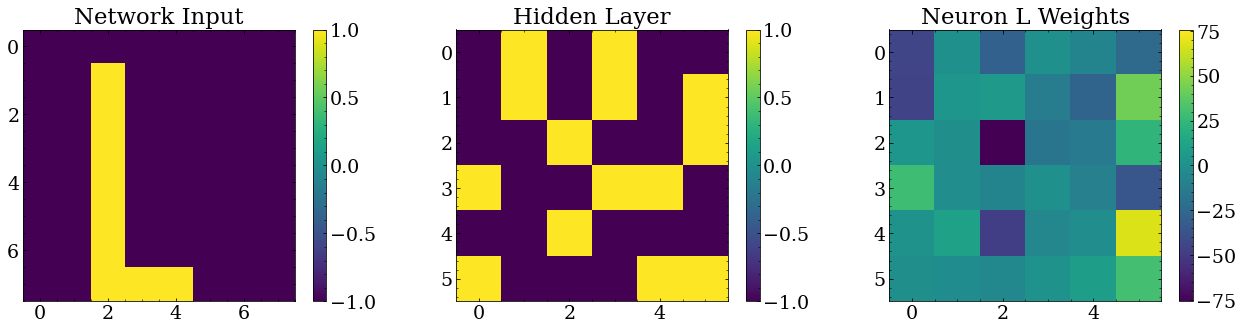

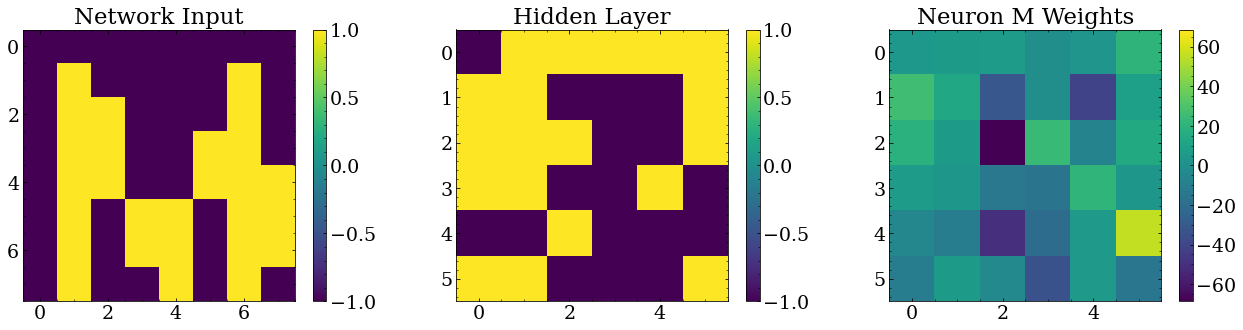

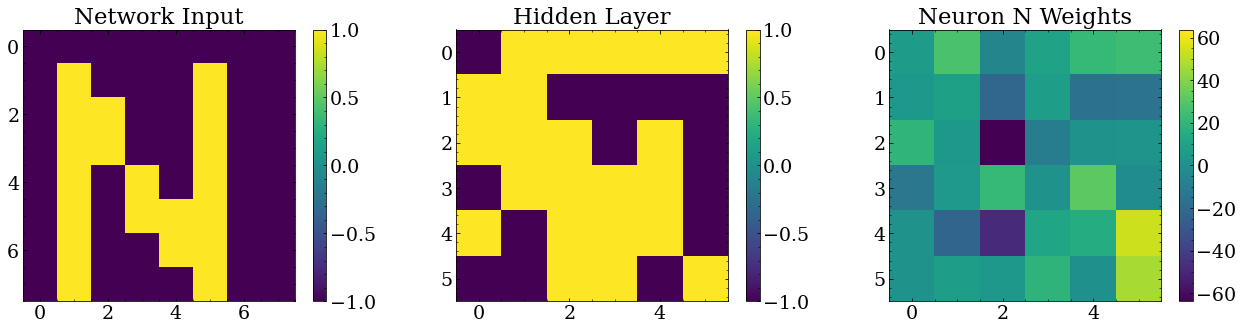

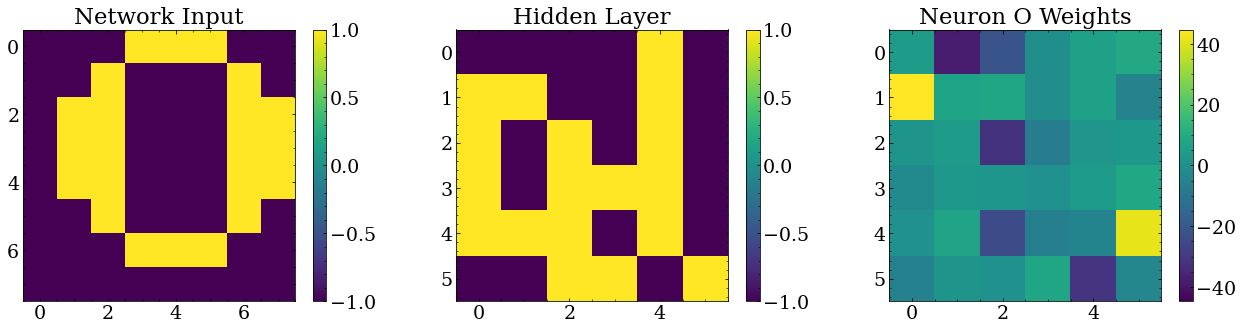

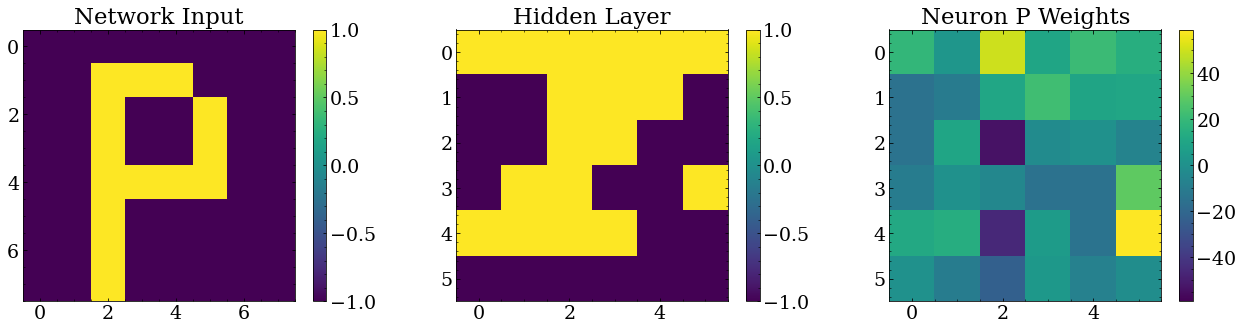

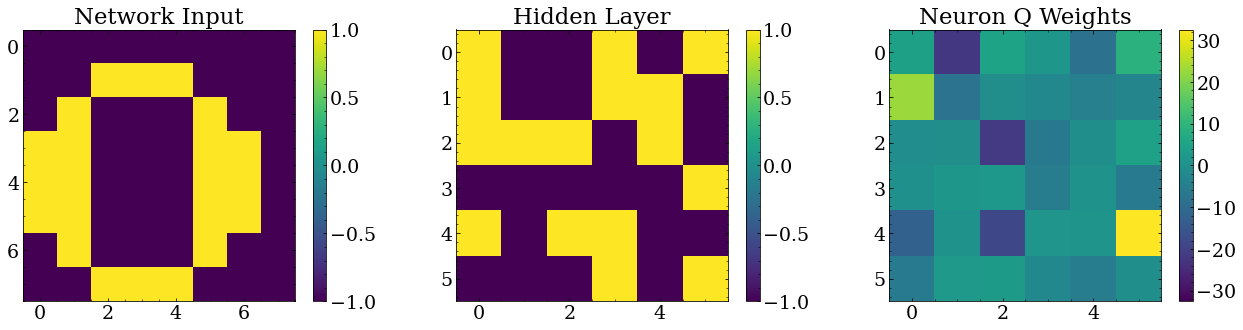

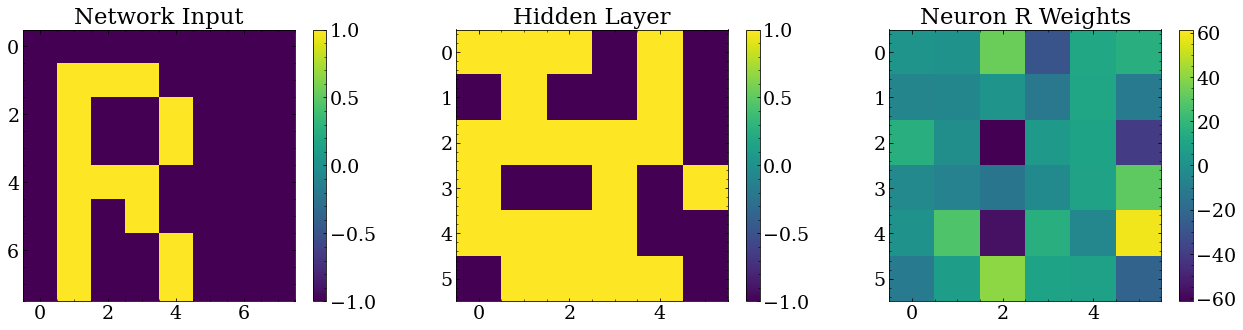

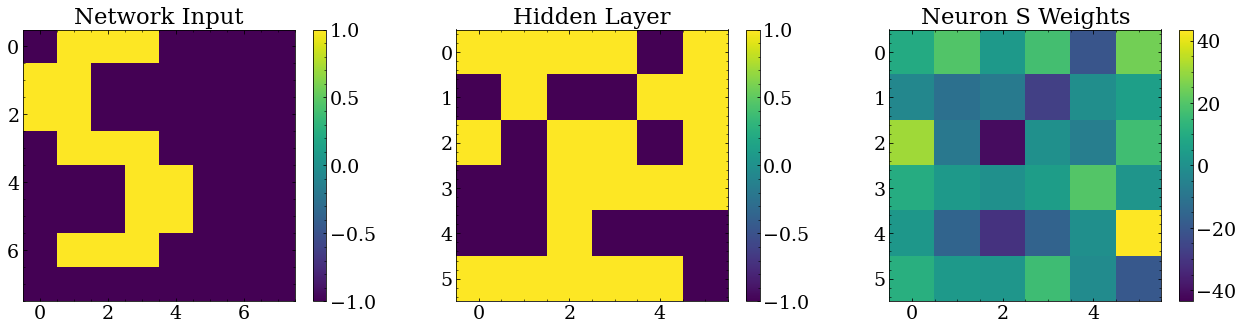

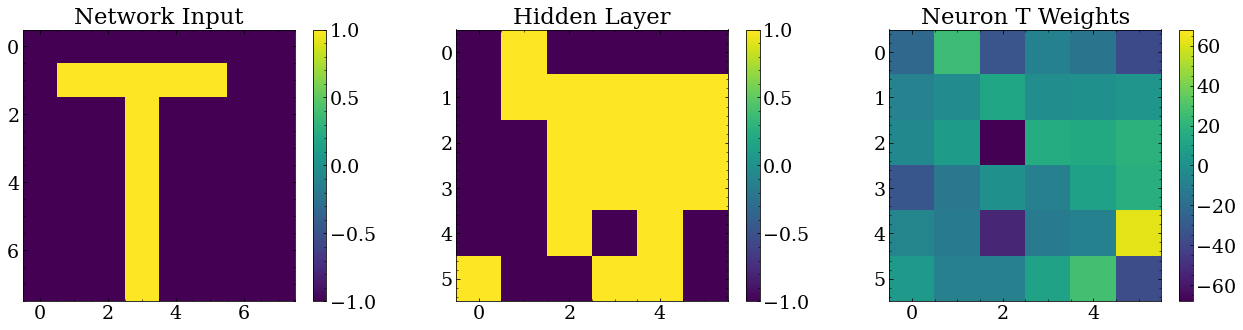

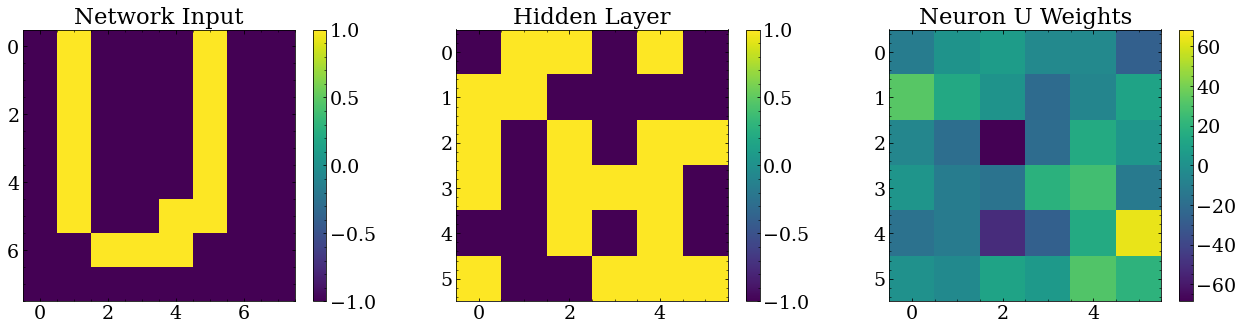

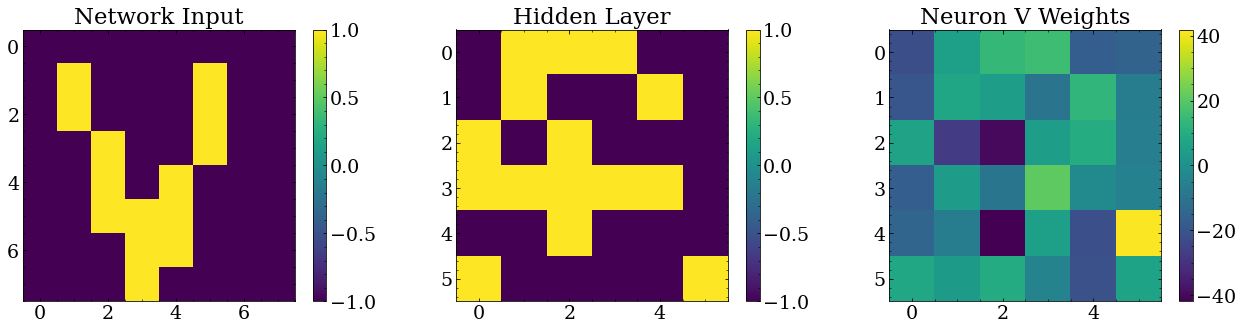

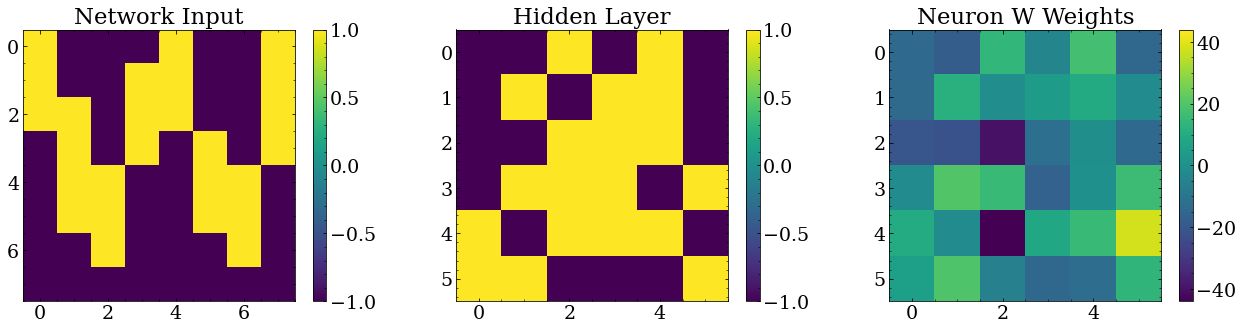

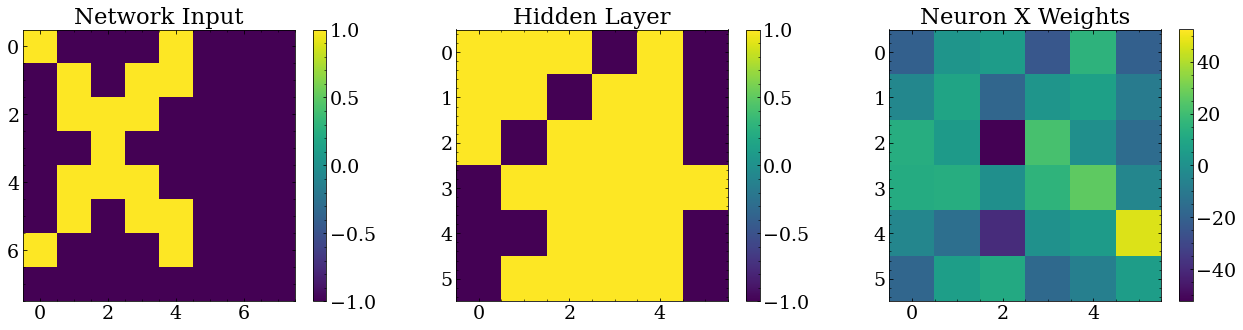

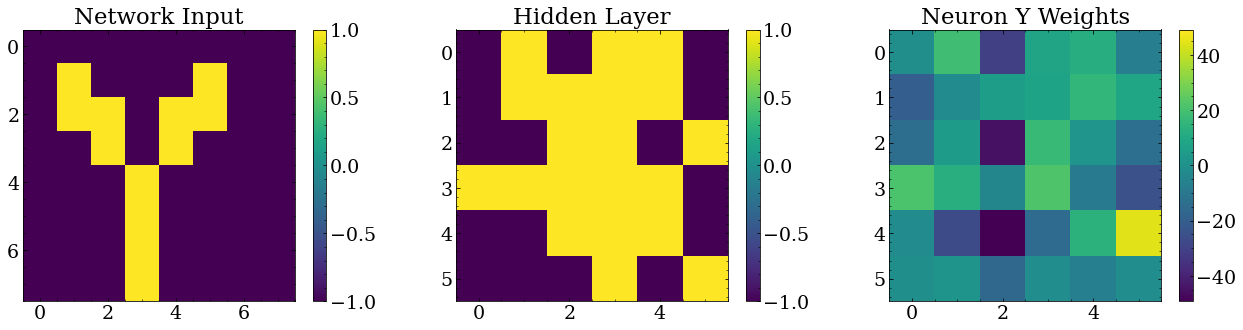

In [8]:
#to plot a simple one hidden layer network

from matplotlib.colors import Normalize

true_norm = Normalize(-1,1)
hidden_shapes = [(int(np.sqrt(l)),int(np.sqrt(l))) for l in [hidden_size]]

for i,iout in enumerate(s.outputs):
    letter = ocr_data.letters[i]
    test_in = ocr_data.gen_data(letter)[1]
    n = s.neurons[iout]
    sort = np.argsort(n.inputs)
    weights = n.weights[sort]
    pltmagic = 100 + 20 + hidden_layers*10
    
    plt.figure(figsize=[22,5])
    plt.subplot(pltmagic+1)
    plt.title('Network Input')
    plt.imshow(test_in,norm=true_norm)
    plt.colorbar()
    
    last_layer = test_in.flatten()
    for i in range(hidden_layers):
        last_layer = np.asarray([n.activate(last_layer,only_inputs=True) for n in hidden_neurons[i]])
        img_hidden = last_layer.reshape(hidden_shapes[i])
    
        plt.subplot(pltmagic+2+i)
        plt.title('Hidden Layer')
        plt.imshow(img_hidden)
        plt.colorbar()

    plt.subplot(pltmagic+2+hidden_layers)
    plt.title('Neuron ''%s'' Weights'%letter)
    img_weights = weights.reshape(hidden_shapes[-1])
    norm = np.max(np.abs(weights))
    weight_norm = Normalize(-norm,norm)
    plt.imshow(img_weights,norm=weight_norm)
    plt.colorbar()
    plt.show()
    plt.close()